In [1]:
!pip install statsmodels

In [2]:
!pip install sklearn

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA

from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
df = pd.read_csv('pib_coree.csv')
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,KOR,QGDP,TOT,PC_CHGPP,Q,1960-Q2,4.496005,NaN
1,KOR,QGDP,TOT,PC_CHGPP,Q,1960-Q3,-1.111563,NaN
2,KOR,QGDP,TOT,PC_CHGPP,Q,1960-Q4,0.596299,NaN
3,KOR,QGDP,TOT,PC_CHGPP,Q,1961-Q1,3.200927,NaN
4,KOR,QGDP,TOT,PC_CHGPP,Q,1961-Q2,4.316423,NaN
...,...,...,...,...,...,...,...,...
471,OECD,QGDP,TOT,PC_CHGPP,Q,2019-Q3,0.427321,NaN
472,OECD,QGDP,TOT,PC_CHGPP,Q,2019-Q4,0.190146,NaN
473,OECD,QGDP,TOT,PC_CHGPP,Q,2020-Q1,-1.855180,NaN
474,OECD,QGDP,TOT,PC_CHGPP,Q,2020-Q2,-10.559907,NaN


In [5]:
df=df[['LOCATION','TIME','Value']].copy()
df

,LOCATION,TIME,Value
0,KOR,1960-Q2,4.496005
1,KOR,1960-Q3,-1.111563
2,KOR,1960-Q4,0.596299
3,KOR,1961-Q1,3.200927
4,KOR,1961-Q2,4.316423
...,...,...,...
471,OECD,2019-Q3,0.427321
472,OECD,2019-Q4,0.190146
473,OECD,2020-Q1,-1.855180
474,OECD,2020-Q2,-10.559907


In [6]:
kor=df.loc[df['LOCATION']=='KOR',:]
kor

,LOCATION,TIME,Value
0,KOR,1960-Q2,4.496005
1,KOR,1960-Q3,-1.111563
2,KOR,1960-Q4,0.596299
3,KOR,1961-Q1,3.200927
4,KOR,1961-Q2,4.316423
...,...,...,...
237,KOR,2019-Q3,0.375455
238,KOR,2019-Q4,1.311630
239,KOR,2020-Q1,-1.281702
240,KOR,2020-Q2,-3.153852


In [7]:
mm=kor.rolling(3,min_periods=2).mean()
mm

,Value
0,NaN
1,1.692221
2,1.326914
3,0.895221
4,2.704550
...,...
237,0.349968
238,0.900409
239,0.135128
240,-1.041308


In [8]:
kor['MM']=mm

C:\Users\anais\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
kor

,LOCATION,TIME,Value,MM
0,KOR,1960-Q2,4.496005,NaN
1,KOR,1960-Q3,-1.111563,1.692221
2,KOR,1960-Q4,0.596299,1.326914
3,KOR,1961-Q1,3.200927,0.895221
4,KOR,1961-Q2,4.316423,2.704550
...,...,...,...,...
237,KOR,2019-Q3,0.375455,0.349968
238,KOR,2019-Q4,1.311630,0.900409
239,KOR,2020-Q1,-1.281702,0.135128
240,KOR,2020-Q2,-3.153852,-1.041308


In [10]:
moy_kor=kor['Value'].mean()
moy_kor

1.757690686107438

In [11]:
var_kor=kor['Value'].var()
var_kor

4.008491061567266

In [12]:
std_kor=kor['Value'].std()
std_kor

2.0021216400526884

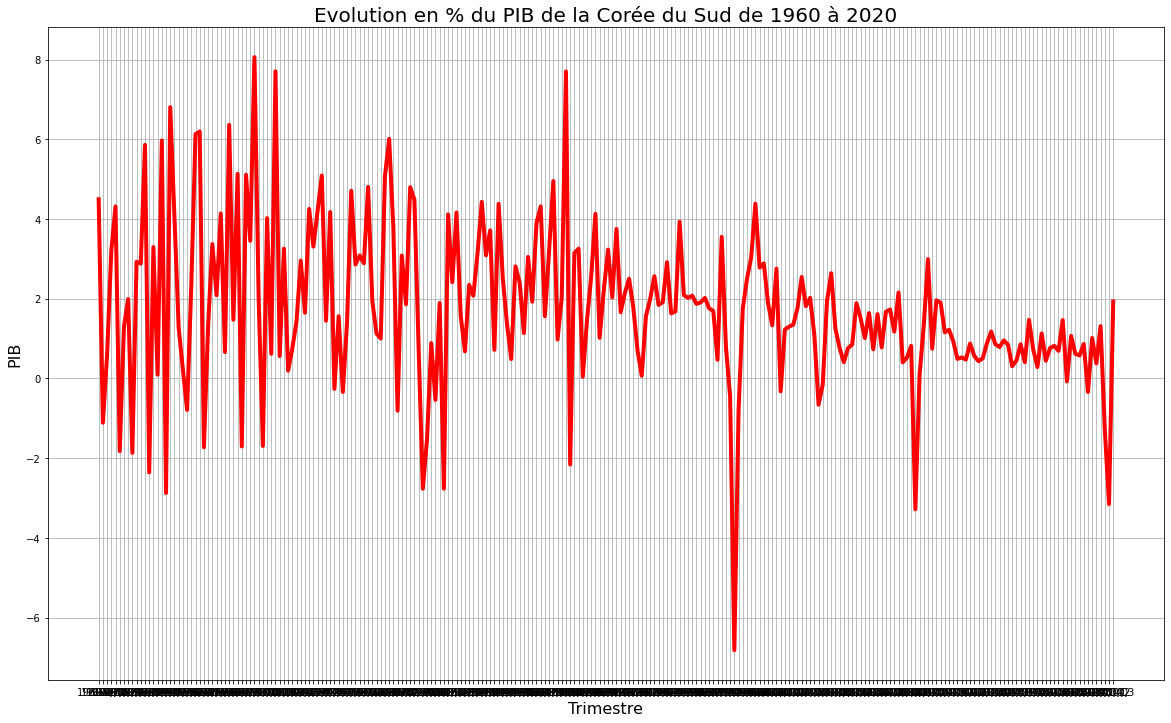

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,12))

plt.plot(kor['TIME'], kor['Value'], color='red', linewidth=4, markersize=10)


plt.xlabel('Trimestre', fontsize=16)
plt.ylabel('PIB', fontsize=16)

plt.grid(True)
plt.title('Evolution en % du PIB de la Corée du Sud de 1960 à 2020', fontsize=20)
plt.show()

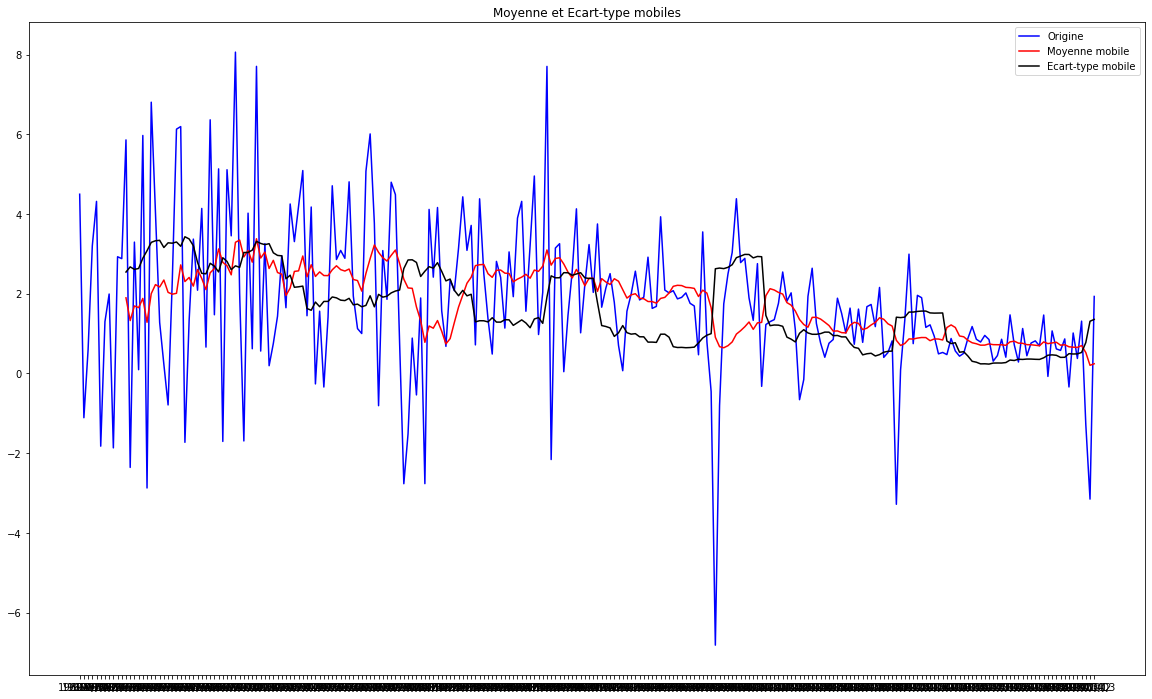

In [14]:
rolling_mean = kor['Value'].rolling(window = 12).mean()
rolling_std = kor['Value'].rolling(window = 12).std()

plt.figure(figsize=(20,12))
plt.plot(kor['TIME'], kor['Value'], color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

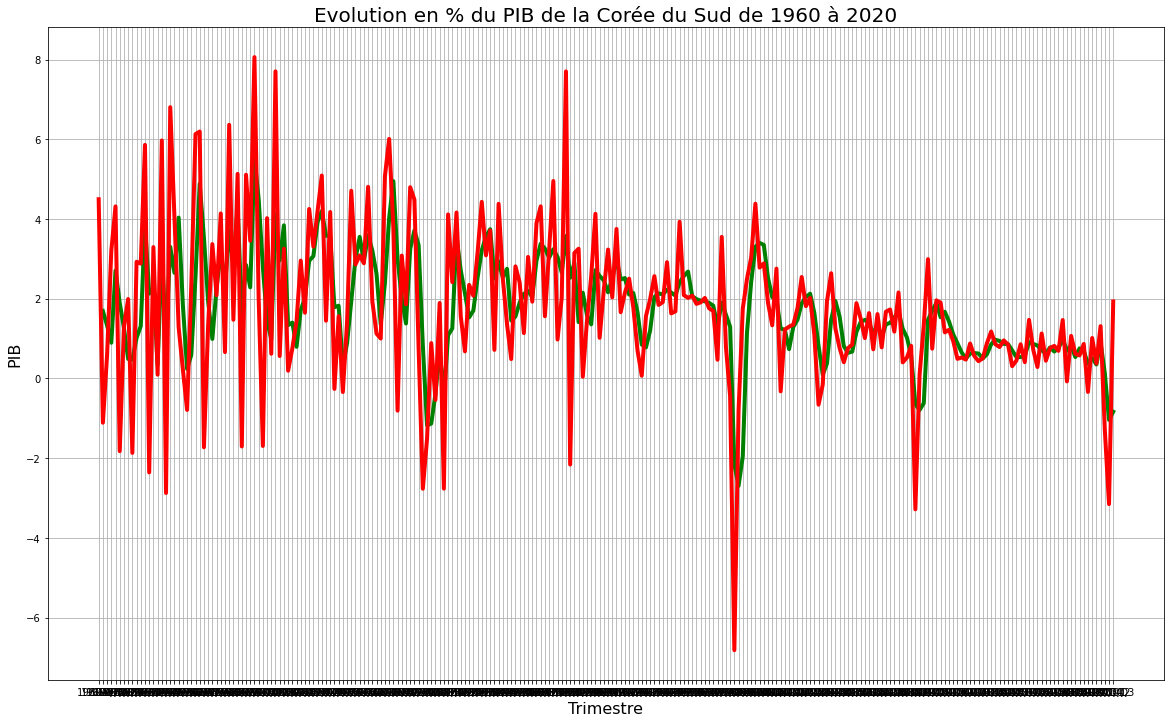

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,12))
plt.plot(kor['TIME'], kor['MM'], color='green', linewidth=4, markersize=10)
plt.plot(kor['TIME'], kor['Value'], color='red', linewidth=4, markersize=10)


plt.xlabel('Trimestre', fontsize=16)
plt.ylabel('PIB', fontsize=16)

plt.grid(True)
plt.title('Evolution en % du PIB de la Corée du Sud de 1960 à 2020', fontsize=20)
plt.show()

In [23]:
korAC=kor[['TIME','MM']]
korAC=korAC.dropna()
korAC

,TIME,MM
1,1960-Q3,1.692221
2,1960-Q4,1.326914
3,1961-Q1,0.895221
4,1961-Q2,2.704550
5,1961-Q3,1.897368
...,...,...
237,2019-Q3,0.349968
238,2019-Q4,0.900409
239,2020-Q1,0.135128
240,2020-Q2,-1.041308


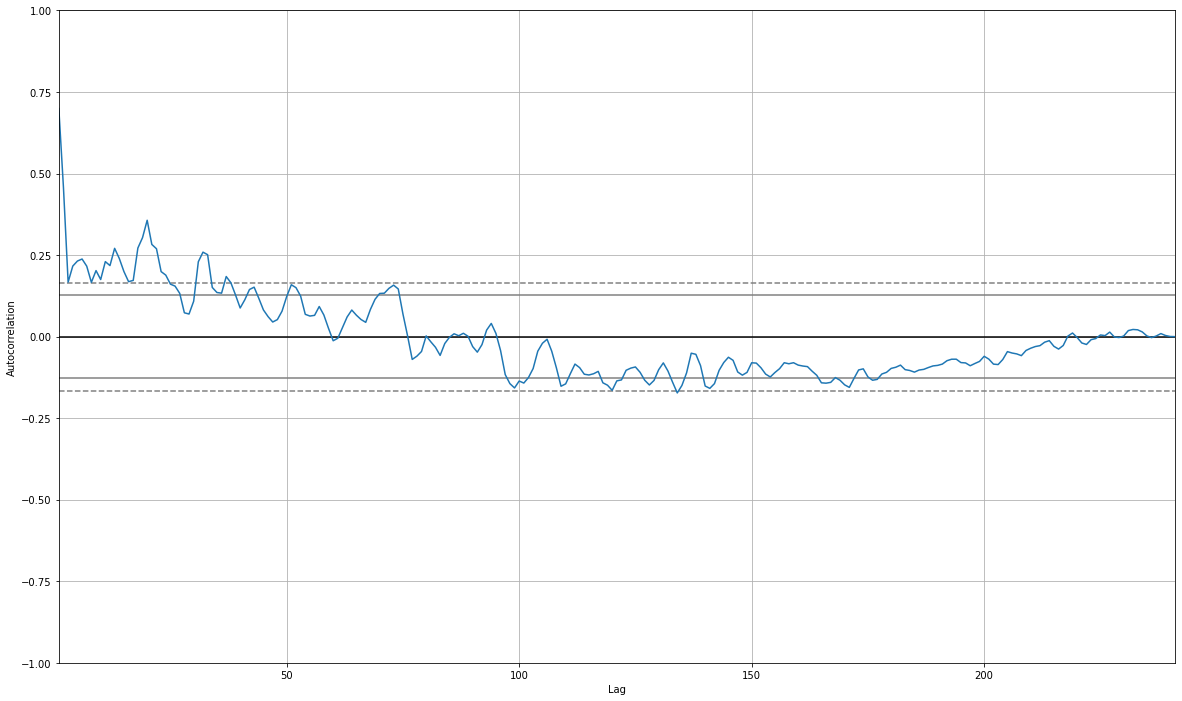

In [30]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,12))
autocorrelation_plot(korAC['MM'])
plt.show()

C:\Users\anais\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anais\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported ind

                             ARIMA Model Results                              
Dep. Variable:                   D.MM   No. Observations:                  240
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -280.419
Method:                       css-mle   S.D. of innovations              0.776
Date:                Sat, 28 Nov 2020   AIC                            574.839
Time:                        19:02:17   BIC                            599.203
Sample:                             1   HQIC                           584.656
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0106      0.035     -0.298      0.765      -0.080       0.059
ar.L1.D.MM    -0.0619      0.064     -0.968      0.333      -0.187       0.063
ar.L2.D.MM     0.1140      0.064      1.769      0.0

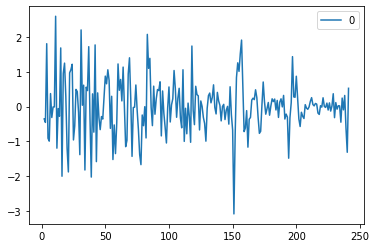

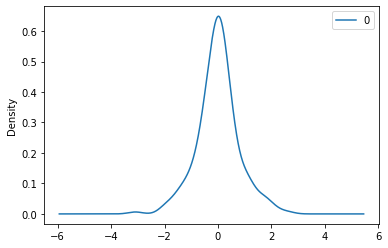

                0
count  240.000000
mean     0.003216
std      0.781295
min     -3.089411
25%     -0.357799
50%      0.003579
75%      0.367840
max      2.601896


In [33]:
# fit model
model = ARIMA(korAC['MM'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=1.558332, expected=2.037939
predicted=1.825708, expected=1.994051
predicted=2.030827, expected=1.254214
predicted=0.727743, expected=1.218563
predicted=0.615836, expected=0.733326
predicted=1.592925, expected=1.291543
predicted=1.381640, expected=1.470553
predicted=1.941289, expected=1.885754
predicted=1.999810, expected=2.039734
predicted=2.046722, expected=2.126143
predicted=2.190127, expected=1.643767
predicted=1.350788, expected=0.820002
predicted=0.733281, expected=0.094682
predicted=0.308151, expected=0.373121
predicted=0.855926, expected=1.472667
predicted=1.933220, expected=1.942317
predicted=1.824180, expected=1.552593
predicted=0.923240, expected=0.807962
predicted=0.825008, expected=0.642340
predicted=0.991701, expected=0.671474
predicted=0.935039, expected=1.165300
predicted=1.203363, expected=1.414432
predicted=1.533556, expected=1.468298
predicted=1.146929, expected=1.385637
predicted=1.103821, expected=1.127395
predicted=1.191593, expected=1.327880
predicted=1.

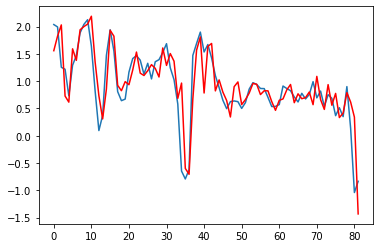

In [42]:
X = korAC['MM'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/